# Midterm Review Solutions

This is a collection of practice problems for the midterm which will be held on Wednesday, October 21st during class time. The midterm will cover topics listed on the Calendar up through Numerical Integration.

Another good source of review is Homeworks 1-5. 

In addition there are the course textbooks:
* __LL__: *Programming for Computations - Python* by Svein Linge and Hans Petter Langtangen, 2nd edition.
* __L__: *A Primer on Scientific Programming with Python* by Hans Petter Langtangen, 2nd edition.
* __TAK__: *Applied Scientific Computing With Python* by Peter R. Turner, Thomas Arildsen, and Kathleen Kavanagh.

The notebooks that I have been working through reference sections in these books.

### Standard imports

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

## 1. Volume of a Cylinder

Write a function `cylinder_volume(r, h)` which returns the volume of a cylinder of radius $r>0$ and height $h>0$.

**Solution:**

In [2]:
def cylinder_volume(r, h):
    return m.pi * r**2 * h 

**Tests for your code:**

In [3]:
# Tests that should be passed
assert abs(cylinder_volume(1, 1) - 3.141592653589793) < 10**-8
assert abs(cylinder_volume(0.5641895835477563, 5) - 5) < 10**-8
assert abs(cylinder_volume(10, 2) - 628.3185307179587) < 10**-8
assert abs(cylinder_volume(10, 10) - 3141.5926535897934) < 10**-8

## 2. Function plotting

Use `matplotlib` to plot the function $sin(\frac{1}{x})$ using $10001$ values of $x$ equally spaced in the interval $[0.00001, 1.00001]$.

**Solution:**

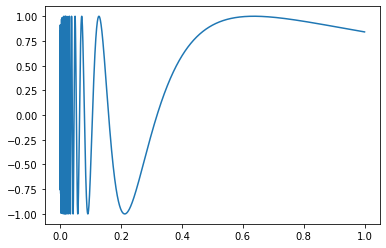

In [4]:
x = np.linspace(0.00001,1.00001,10001)
y = np.sin(1/x)
plt.plot(x,y)
plt.show()

**Tests for your code:**

<span style="color:blue">**Check your work:** Your plot should look something like this:</span>

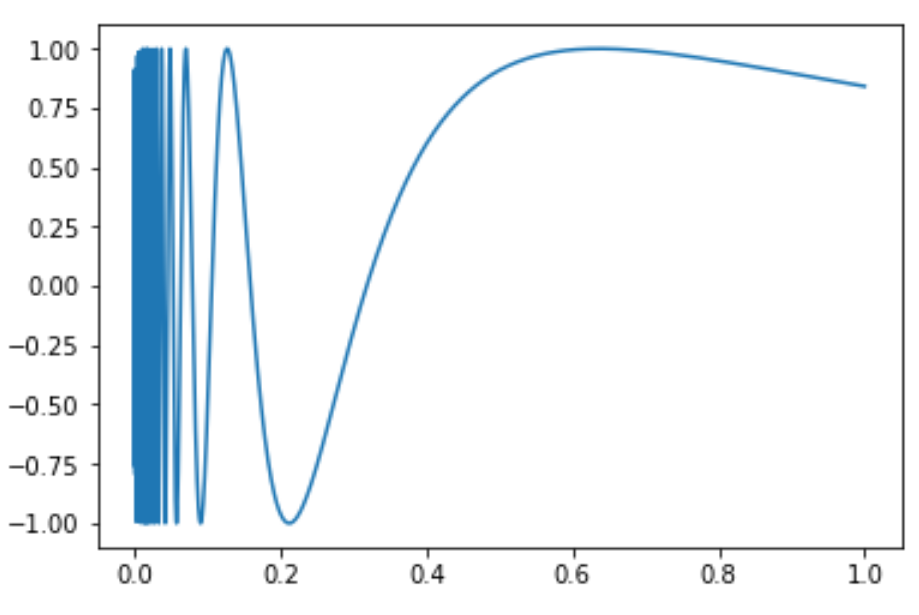

## 3. Evaluating a series

Consider the series $\sum_{k=0}^\infty x_k$ where
$$x_k = \frac{(-1)^k}{1+\sqrt{k}}$$
defined for $k \geq 0$.

Find the smallest $N \geq 2$ such that 
$$|x_{N-2}|+|x_{N-1}|+|x_N| < \frac{1}{30 \pi}.$$
Store this value of $N$ in the variable `N_stop` and store the partial sum
$$\sum_{k=0}^N x_k$$
in the variable `partial_sum_stop`.

**Solution:**

First we represent the sequence $x_k$ as a function:

In [5]:
def x(k):
    return (-1)**k / (1 + m.sqrt(k))

The smallest $N$ could be is $2$. We set up $N$ and the associated partial sum $S$.

In [6]:
N = 2
S = x(0) + x(1) + x(2)

Now while the equation 
$$|x_{N-2}|+|x_{N-1}|+|x_N| < \frac{1}{30 \pi}$$
is not true, we increment $N$ and update the value of the partial sum.

In [7]:
while abs(x(N-2)) + abs(x(N-1)) + abs(x(N)) >= 1/(30*m.pi):
    N += 1
    S += x(N)

Now the current value of $N$ should be want we want for `N_stop` and the value of `S` should be the partial sum we want.

In [8]:
N_stop = N
N_stop

79381

In [9]:
partial_sum_stop = S
partial_sum_stop

0.719949078936373

**Tests for your code:**

In [10]:
assert type(N_stop) == int
assert type(partial_sum_stop) == float
assert 79000 < N_stop < 80000
assert 0.71 < partial_sum_stop < 0.72

## 4. Base 7

Write a function `base7(n)` which takes as input an integer $n > 0$ and converts it to a string storing its representation in base $7$. The returned string will consist only of the characters in the set $\{0,1,2,3,4,5,6\}$.

For example, the number $67$ in base $7$ is is given by `124` since
$$67 = 1 \cdot 7^2 + 2 \cdot 7 + 4.$$
Thus `base7(67)` should return the string `'124'`.

**Solution:**

In [11]:
def base7(n):
    value = n
    s = ""
    while value != 0:
        s = str(value % 7) + s
        value = value // 7
    return s

**Tests for your code:**

In [12]:
# Tests
assert base7(6) == '6', 'Failed for n = 6.'
assert base7(49) == '100', 'Failed for n = 49.'
assert base7(67) == '124', 'Failed for n = 67.'
assert base7(151235) == '1166630', 'Failed for n = 151235.'
assert base7(6723477342423466) == '4062124131215314042', 'Failed for n = 6723477342423466.'

## 5. Base 7 to integer

Write a function `base7_to_int(s)` which takes as input a string `s` of characters in the list `0`, `1`, `2`, `3`, `4`, `5`, `6` and returns the integer the string represents in base $7$.

For example, `base7_to_int('6124')` should return `2125` because
$$6 \cdot 7^3 + 1 \cdot 7^2 + 2 \cdot 7 + 4 = 2125.$$

(*Hints:* If a string `c` stores a digit, you can turn it into its integer representation with `int(c)`.)

**Solution:**

In [13]:
def base7_to_int(s):
    l = len(s)
    total = 0
    for i in range(0,l):
        total += int(s[l-1-i]) * 7**i
    return total

**Tests for your code:**

In [14]:
assert base7_to_int('6124') == 2125, "base7_to_int('6124') is wrong."
assert base7_to_int('6') == 6, "base7_to_int('6') is wrong."
assert base7_to_int('10') == 7, "base7_to_int('10') is wrong."
assert base7_to_int('100') == 49, "base7_to_int('10') is wrong."
assert base7_to_int('1000') == 343, "base7_to_int('10') is wrong."

## 6. ArcTan

Inverse tangent is an analytic function. It's Taylor series centered at the origin is given by $$\tan^{-1}(x) = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} +\ldots.$$
This series converges for values of $x \in [-1,1]$.

Write a function `arctan_partial_sum(x, d)` which takes as input a float $x \in [-1,1]$ and an integer $d$ and returns the Taylor polynomial of degree $d$ evaluated at $x$. Use Python's built in floats to carry out the calculation.

**Solution:**

The key thing is to understand the coefficients of the Taylor series. The following function gives the coefficient of degree d.

In [15]:
def arctan_coef(d):
    if d % 2 == 0:
        return 0
    if d % 4 == 1:
        return 1/d
    if d % 4 == 3:
        return -1/d

To check it, lets print out a few.

In [16]:
for d in range(10):
    print("{} * x^{}".format(arctan_coef(d),d))

0 * x^0
1.0 * x^1
0 * x^2
-0.3333333333333333 * x^3
0 * x^4
0.2 * x^5
0 * x^6
-0.14285714285714285 * x^7
0 * x^8
0.1111111111111111 * x^9


In [17]:
def arctan_partial_sum(x, d):
    total = 0.0
    k = 0
    x_power = 1.0 # will always store x^k
    while k <= d:
        total += arctan_coef(k) * x_power
        k += 1
        x_power *= x
    return total

For sanity, we check that $\arctan(1)$ is approximately correct.

In [18]:
arctan_partial_sum(1,1000)

0.7848981638974463

In [19]:
m.atan(1)

0.7853981633974483

**Tests for your code:**

In [20]:
assert abs(arctan_partial_sum(0.5, 0)) < 10**-8, "Error with input (0.5, 0)."
assert abs(arctan_partial_sum(0.3,1)-0.3) < 10**-8, "Error with input (0.3,1)."
assert abs(arctan_partial_sum(0.7,2)-0.7) < 10**-8, "Error with input (0.7,2)."
assert abs(arctan_partial_sum(0.5,10)-0.46368427579365) < 10**-8, \
    "Error with input (0.5,10)."
assert abs(arctan_partial_sum(1,100) - 0.7803986631477527) < 10**-8, \
    "Error with input (1,100)."

## 7. ArcTan continued

The usual form for the remainder in the Taylor series is not immediately useful, since it requires us to control high order derivatives of $\tan^{-1}$. 

However, observe that the degree $d$ term of the Taylor series for $\tan^{-1}$ has absolute value less than $|x|^d$. Thus the remainder $R_d(x)-\tan^{-1}(x)$ satisfies
$$-\sum_{k=d+1}^\infty |x|^k < R_d(x) < \sum_{k=d+1}^\infty |x|^k.$$
Observe that $\sum_{k=d+1}^\infty |x|^k$ is a geometric series and can be evaluated by a standard formula.

Write a function `arc_tan_degree(x, epsilon)` which takes as input an $x \in (-1,1)$ and an $\epsilon>0$ and returns an integer $d$ such that $|R_d(x)|<\epsilon$.

Use your function to compute $\tan^{-1}(\frac{1}{2})$ correct to $8$-significant digits. Store the result as a float in the variable `arc_tan_half`.

You can use floats and ignore the effects of round off error.

<span style="color: red">**Remark:** This problem would be too hard and time consuming for a test, but it is still good practice.</span>

**Solution:**

First we consider `arc_tan_degree(x, epsilon)`. As noted in the problem description, we want to guaranee that $|R_d(x)|<\epsilon$. We know 
$$|R_d(x)|<\sum_{k=d+1}^\infty |x|^k,$$
so it suffices to guarantee that $\sum_{k=d+1}^\infty |x|^k<\epsilon$. The series is convergent because $|x|<1$. Recall the trick to evaluate a convegent geometric series. Let $y=\sum_{k=d+1}^\infty |x|^k$. Then $$y + |x|^d=\sum_{k=d}^\infty |x|^k.$$
Multiplying through by $|x|$ yields
$$|x| ( y + |x|^d ) = \sum_{k=d+1}^\infty |x|^k.$$
Thus, $|x| ( y + |x|^d )=y$. Solving for $y$, we find
$$y=\frac{|x|^{d+1}}{1 - |x|}.$$
We want to find a $d$ so that $y<\epsilon$. So, consider the expression 
$$\frac{|x|^{d+1}}{1 - |x|}<\epsilon.$$
This is equivalent to 
$$|x|^{d+1} < \epsilon (1-|x|).$$
Taking the logarithm of both sides yields
$$(d+1) \log |x| < \log \epsilon + \log (1-|x|).$$
Thus observe that $|x|<1$ so $\log |x|<0$. Therefore, by dividing through by $\log |x|$, we see that this is equivalent to
$$d+1 > \frac{\log \epsilon + \log (1-|x|)}{\log |x|}.$$
Thus, we can take $d$ to be the smallest non-negative integer greater than 
$$-1 + \frac{\log \epsilon + \log (1-|x|)}{\log |x|}.$$
That is 
$$d = \max \left\{0, \left\lfloor \frac{\log \epsilon + \log (1-|x|)}{\log |x|} \right\rfloor\right\},$$
where $\lfloor \star \rfloor$ denotes the *floor function*, i.e., $\lfloor \star \rfloor$ is the largest integer less than or equal to $\star$.

In [21]:
def arc_tan_degree(x, epsilon):
    q = (m.log(epsilon) + m.log(1-abs(x))) / m.log(abs(x))
    degree = m.floor(q)
    if degree < 0:
        return 0
    else:
        return degree

To control the significant digits, we need to know what the most significant digit of $\tan^{-1}(\frac{1}{2})$ is. 
Recall $\tan^{-1}$ is an increasing function, and $\tan^{-1}(0)=0$ and $\tan^{-1}(\frac{\pi}{4})=1$. Since $0<\frac{1}{2} < \frac{\pi}{4}$, we know that $$0<\tan^{-1}(\frac{1}{2})<1.$$
Therefore the most significant digit of $\tan^{-1}(\frac{1}{2})$ will be in the tenths place (place value $0.1$).
So, we are being asked to compute $\tan^{-1}(\frac{1}{2})$ to within $10^{-8}$ of the actual value.

In [22]:
d = arc_tan_degree(0.5, 10**-8)
d

27

We use this value of `d` to compute our approximate `arc_tan_half`.

In [23]:
arc_tan_half = arctan_partial_sum(0.5, d)
arc_tan_half

0.46364760894874296

To be sure our answer is accurate, we can compare to the result found using the math library.

In [24]:
abs(arc_tan_half - m.atan(0.5))

5.206313158367948e-11

Our answer seems to be correct to about 10 decimal places.

**Tests for your code:**

In [25]:
assert abs(arc_tan_half - m.atan(0.5)) < 10**-8
assert arc_tan_degree(0.25, 100) == 0
assert abs(arctan_partial_sum(0.25, arc_tan_degree(0.25, 0.5*10**-4)) - m.atan(0.25)) < 10**-4
assert abs(arctan_partial_sum(0.75, arc_tan_degree(0.75, 0.5*10**-6)) - m.atan(0.75)) < 10**-6

## 8. Fibonacci list

The Fibonacci numbers are defined inductively by 
$F_0=1$, $F_1=1$ and 
$$F_{n+1}=F_n + F_{n-1} \quad \text{for all $n \geq 1$.}$$
The first few values are printed below:
$$F_0 = 1,~F_1 = 1,~F_2 = 2,~F_3 = 3,~F_4 = 5,~F_5 = 8,~F_6 = 13,~F_7 = 21,~F_8 = 34,~F_9 = 55.$$ 

Write a function `fibonacci_list(n)` which returns a list consisting of the first $n$ Fibonacci numbers. Here $n$ should be an non-negative integer. 

**Solution:**

Basically, we want to create the list by a loop. We'll start with `[1, 1]` and keep adding to the list until our list has length $n$. We just want to add the two numbers at the end of the list, and append the result to the list.

In [26]:
def fibonacci_list(n):

    # Check that n is a non-negative integer
    assert type(n)==int and n>=0, 'n should be a non-negative integer'
    
    # Deal with some special cases:
    if n == 0:
        return []
    if n==1:
        return [1]

    # Otherwise n >= 2 and we proceed as suggested above.
    lst = [1, 1]
    while len(lst) < n:
        lst.append(lst[-1] + lst[-2])
    return lst

**Tests for your code:**

In [27]:
assert fibonacci_list(10) == [1, 1, 2, 3, 5, 8, 13, 21, 34, 55], \
    'fibonacci_list(10) is incorrect'
for n in range(10):
    assert len(fibonacci_list(n)) == n, \
        f'The length of fibonacci_list({n}) is incorrect'

## 9. Fibonacci induction

Inductively prove that if $n \geq 7$, then $F_n > 1.5^n$.

*Hint:* Show by computation that $F_7 > 1.5^7$ and $F_8 > 1.5^8$. Argue that if $F_n > 1.5^n$ and $F_{n-1} > 1.5^{n-1}$, then $F_{n+1} > 1.5^{n+1}$ using the fact that $F_{n+1}=F_n+F_{n-1}$.  

**Solution:**

We will follow the hint.

Below we check that the statement is true for $n=7$ and $n=8$. This constitutes our base case.

In [28]:
fl = fibonacci_list(9)
for n in [7, 8]:
    print(f"F_{n} = {fl[n]}, which is greater than 1.5^{n} which is approximately {1.5**n:.4g}.")

F_7 = 21, which is greater than 1.5^7 which is approximately 17.09.
F_8 = 34, which is greater than 1.5^8 which is approximately 25.63.


Now assume that $F_{n-1}>1.5^{n-1}$ and $F_{n}>1.5^{n}$. We must prove that $F_{n+1}>1.5^{n+1}$. Observe that
$$F_{n+1} = F_n + F_{n-1} > 1.5^{n} + 1.5^{n-1}.$$
We want to write the right-hand side in terms of $1.5^{n+1}$, so observe that $1.5^{n}= \frac{2}{3} (1.5^{n+1})$
and $1.5^{n-1}= \frac{4}{9} (1.5^{n+1})$. Plugging these values in, we see that 
$$F_{n+1} >  \frac{2}{3} (1.5^{n+1}) + \frac{4}{9} (1.5^{n+1})=\frac{10}{9} (1.5^{n+1})> 1.5^{n+1}.$$
This completes the inductive step. By the principle of mathematical induction, we know $F_n > 1.5^n$ for all $n \geq 7$.

## 10. Power inequality

Prove that $7^n - 5^n > 6^n$ for integers $n \geq 3$.

*Remarks:* The base case can be confirmed by computation. Include your proof in a Markdown cell in the notebook. (Including a picture of your hand-written proof is okay. You should be able to insert an image in Jupyter by clicking Edit > Insert Image.)

**Solution:**

We will prove the statement by induction.
Our base case is the statement when $n=3$, which we check below by computation.

In [29]:
n = 3
print("When n=3, 7^n-5^n = {}".format(7**n-5**n))
print("When n=3, 6^n = {}".format(6**n))

When n=3, 7^n-5^n = 218
When n=3, 6^n = 216


**Base case:** Since $218>216$, the statement is true for $n = 3$.

**Inductive step:** We will assume that $k \geq 3$ and $7^k - 5^k > 6^k$, and we will prove that $7^{k+1} - 5^{k+1} > 6^{k+1}$.

Observe that
$$7^{k+1} - 5^{k+1} = 7 \cdot 7^k - 5 \cdot 5^{k} > 6 \cdot 7^k - 6 \cdot 5^{k}=6(7^k - 5^k).$$
By inductive hypothese, we know that $7^k - 5^k > 6^k$. Therefore,
$$7^{k+1} - 5^{k+1} > 6(7^k - 5^k) > 6 \cdot 6^k = 6^{k+1}.$$
Thus we have shown that $7^{k+1} - 5^{k+1} > 6^{k+1}.$


By the Principle of Mathematical Induction, $7^n - 5^n > 6^n$ for integers $n \geq 3$.

## 11. Derivative with currying

Write a funtion `derivative(f, h)` which takes as input:
* A function `f(x)`, which takes as input a floating point real number and produces a floating point real number as its output.
* A float $h>0$. 

The `derivative` function should return a new function `df(x)`. The function `df(x)` should take as input a floating point real number `x` and return the symmetric two-point approximation of the derivative of $f$ at $x$ using points at distance $h$ from $x$.

The `derivative` function should make use of currying.

**Solution:**

In [30]:
def derivative(f, h):
    def df(x):
        return (f(x+h) - f(x-h)) / (2*h)
    return df

**Tests for your code:**

In [31]:
# Test 
f = lambda x: np.sin(x)
df = derivative(f, 10**-8)
for x in np.linspace(0, 3, 201):
    assert abs( df(x) - np.cos(x) ) < 10**-8, \
        "The value df({:0.2f}) is incorrect.".format(x)

## 12. Speed of a crash

A malfunctioning drone crashes destroying itself. The list `altitude_list` below contains pairs consisting of a time (in seconds) and a measurement of the drone's altitude (in meters). The drone crashes shortly after the $5$ second mark.

* Approximately fast was the drone falling when it crashed into the ground? Store the answer (which would be in meters per second) in the variable `crash_speed`.

* Before the drone crashed, it accellerated upward for some unknown reason. What was the fastest speed it was moving upward over the provided time interval? At approximately what time was it moving at that speed? Store the respective answers in `up_speed` and `up_time`.

In [32]:
altitude_list = [(0.0, 2.0438), (0.1, 2.1013), (0.2, 2.1577), (0.3, 2.2136), (0.4, 2.2699), 
                 (0.5, 2.3271), (0.6, 2.3859), (0.7, 2.4472), (0.8, 2.5117), (0.9, 2.5799), 
                 (1.0, 2.6528), (1.1, 2.7311), (1.2, 2.8154), (1.3, 2.9066), (1.4, 3.0053), 
                 (1.5, 3.1123), (1.6, 3.2281), (1.7, 3.3535), (1.8, 3.4888), (1.9, 3.6347), 
                 (2.0, 3.7915), (2.1, 3.9593), (2.2, 4.1384), (2.3, 4.3285), (2.4, 4.5294), 
                 (2.5, 4.7406), (2.6, 4.9613), (2.7, 5.1904), (2.8, 5.4263), (2.9, 5.6672), 
                 (3.0, 5.9109), (3.1, 6.1543), (3.2, 6.3941), (3.3, 6.6263), (3.4, 6.8462), 
                 (3.5, 7.048), (3.6, 7.2256), (3.7, 7.3716), (3.8, 7.4775), (3.9, 7.5341), 
                 (4.0, 7.5307), (4.1, 7.4553), (4.2, 7.2945), (4.3, 7.0336), (4.4, 6.656), 
                 (4.5, 6.1436), (4.6, 5.4763), (4.7, 4.6323), (4.8, 3.5874), (4.9, 2.3156), 
                 (5.0, 0.7886)]

**Solution:**

First we'll separate the times from the altitudes.

In [33]:
times = []
altitudes = []
for t,a in altitude_list:
    times.append(t)
    altitudes.append(a)
print(f'Times: {times}\n')
print(f'Altitudes: {altitudes}')

Times: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]

Altitudes: [2.0438, 2.1013, 2.1577, 2.2136, 2.2699, 2.3271, 2.3859, 2.4472, 2.5117, 2.5799, 2.6528, 2.7311, 2.8154, 2.9066, 3.0053, 3.1123, 3.2281, 3.3535, 3.4888, 3.6347, 3.7915, 3.9593, 4.1384, 4.3285, 4.5294, 4.7406, 4.9613, 5.1904, 5.4263, 5.6672, 5.9109, 6.1543, 6.3941, 6.6263, 6.8462, 7.048, 7.2256, 7.3716, 7.4775, 7.5341, 7.5307, 7.4553, 7.2945, 7.0336, 6.656, 6.1436, 5.4763, 4.6323, 3.5874, 2.3156, 0.7886]


We can plot the drone's altitude using Matplotlib.

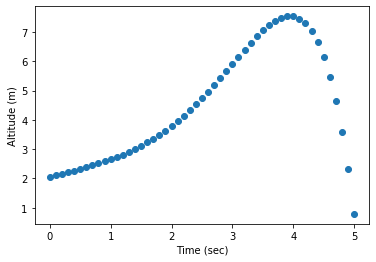

In [34]:
plt.plot(times, altitudes, 'o')
plt.xlabel('Time (sec)')
plt.ylabel('Altitude (m)')
plt.show()

We can see the drone go up and then fall.

For our approximation for the velocity at the crash, we take the slope of the line segment joining the last two dots in our data.

In [35]:
crash_speed = (altitudes[-1] - altitudes[-2]) / (times[-1] - times[-2])
crash_speed

-15.270000000000053

Now we need to find the time at which the drone is moving most quickly upward.

In [36]:
up_speed = 0
up_time = 0
for i in range(len(times)-1):
    t = times[i]
    alt = altitudes[i]
    next_t = times[i+1]
    next_alt = altitudes[i+1]
    s = (next_alt - alt) / (next_t - t)
    if s > up_speed:
        up_speed = s
        up_time = (t + next_t)/2
print("up_time = {}".format(up_time))
print("up_speed = {}".format(up_speed))

up_time = 2.95
up_speed = 2.4369999999999936


**Tests for your code:**

In [37]:
# Test 
f = lambda x: np.sin(x)
df = derivative(f, 10**-8)
for x in np.linspace(0, 3, 201):
    assert abs( df(x) - np.cos(x) ) < 10**-8, \
        "The value df({:0.2f}) is incorrect.".format(x)

## 13. Implementing a quadrature rule

This problem concerns the following quadrature rule, defined for any interval $[a, b]$:
$$Q_{[a,b]}(f) = (b-a) \left(\frac{1}{4} f\left(\frac{2a+b}{3}\right) + \frac{1}{2} f\left(\frac{a+b}{2}\right) + \frac{1}{4} f\left(\frac{a+2b}{3}\right)\right).$$

* Define a function `q(a , b, f)` which takes as input floating point real numbers $a$ and $b$ with $a<b$ and a function `f` representing a real-valued function $f:{\mathbb R} \to {\mathbb R}$. The function should return $Q_{[a,b]}(f)$.

* What is the degree of of precision of $Q_{[a,b]}$? Store the answer in the variable `q_degree`.

**Solution:**

In [38]:
def q(a, b, f):
    return (b-a) * (0.25 * f((2*a+b)/3) + 0.5 * f((a+b)/2) + 0.25 * f((a+2*b)/3))

In [39]:
# Just a check
f = lambda x: x**2
print(q(0, 1, f)) # computed value
print(0.25*(1/3)**2 + 0.5*(1/2)**2+0.25*(2/3)**2) # by hand

0.2638888888888889
0.2638888888888889


The above looks okay. Lets check the degree of precision. We'll use the interval $[0,1]$. (Because the quadrature scales linearly with the length of the interval, it won't matter which interval you use to check the precision.)

In [40]:
q(0, 1, lambda x: 1)

1.0

The above answer of $1.0$ agrees with $\int_0^1 1~dx$, so the degree of precision is at least $0$.

In [41]:
q(0, 1, lambda x: x)

0.5

The above answer of $0.5$ agrees with $\int_0^1 x~dx$, so the degree of precision is at least $1$.

In [42]:
q(0, 1, lambda x: x**2)

0.2638888888888889

The above answer of $0.26\ldots$ is not the same as $\int_0^1 x^2~dx=\frac{1}{3}$, so the degree of precision is exactly $1$.

In [43]:
q_degree = 1
q_degree

1

## 14. Compound quadrature rule

This problem continues the last one, where we defined `q(f, a, b)` to represent $Q_{[a,b]}(f)$.

Write a function `q_compound(n, f)` which takes as input a positive integer $n$ and a function $f$ as above. The function should divide the interval $[0,1]$ into $n$ equal sized subintervals. It should return the sum of $Q_{\ast}(f)$ where $\ast$ varies over the $n$ subintervals.

Test that `q_compound` is reasonable by comparing the approximate integral with the actual integral for some nice function on $[0, 1]$.

**Solution:**

Note that we can divide $[0,1]$ into $n$ equal sized intervals with the code
```python
np.linspace(0, 1, n+1)
```
This is demonstrated below.

In [44]:
n = 3
np.linspace(0, 1, n+1)

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [45]:
def q_compound(n, f):
    total = 0.0
    x = np.linspace(0, 1, n+1)
    for i in range(n):
        a = x[i]
        b = x[i+1]
        total += q(a, b, f)
    return total

Recall $\int_0^1 \sin x~dx=1-\cos(1).$ We'll check that our `q_compound` is about right.

In [46]:
val = q_compound(100, lambda x: np.sin(x))
print("val = {} should be about 1-cos(1) = {}.".format(val, 1-np.cos(1)))

val = 0.4596992903087396 should be about 1-cos(1) = 0.45969769413186023.
